In [21]:
# [0]
# import Libs
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

import helper

# Preparing dataset

In [22]:
# Display our data
import os
for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


./input/ratings.csv
./input/movies.csv


In [70]:
# [1]
# Import the Movies dataset
movies = pd.read_csv('./input/movies.csv')
movies.head()

,movieId
count,9125.000000
mean,31123.291836
std,40782.633604
min,1.000000
25%,2850.000000
50%,6290.000000
75%,56274.000000
max,164979.000000


In [69]:
# [sub_1]
# Displaying movie's info
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9125 non-null   int64 
 1   title    9125 non-null   object
 2   genres   9125 non-null   object
dtypes: int64(1), object(2)
memory usage: 214.0+ KB


,movieId
count,9125.000000
mean,31123.291836
std,40782.633604
min,1.000000
25%,2850.000000
50%,6290.000000
75%,56274.000000
max,164979.000000


In [25]:
# [2]
# Import the ratings dataset
ratings = pd.read_csv('./input/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [26]:
# [sub_2]
# Displaying movie's info
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [27]:
# [3]
# Record for each table
print('The dataset contains: ', len(ratings), ' ratings of ', len(movies), ' movies.')

The dataset contains:  100004  ratings of  9125  movies.


# Let's start 
Taking a subset of users, and seeing what their preferred genres are.

In [28]:
movies.genres

0       Adventure|Animation|Children|Comedy|Fantasy
1                        Adventure|Children|Fantasy
2                                    Comedy|Romance
3                              Comedy|Drama|Romance
4                                            Comedy
                           ...                     
9120                        Adventure|Drama|Romance
9121                Action|Adventure|Fantasy|Sci-Fi
9122                                    Documentary
9123                                         Comedy
9124                                    Documentary
Name: genres, Length: 9125, dtype: object

In [29]:
# [4]
# Calculate the average rating of ['Romance', 'Comedy'] movies
# get_genre_ratings(ratings, movies, genres, column_names)
genre_ratings_columns = ['Romance', 'Sci-Fi']
genre_ratings_avg_columns = ['avg_romance_rating', 'avg_scifi_rating']

genre_ratings = helper.get_genre_ratings(ratings, movies, , ['avg_romance_rating', 'avg_scifi_rating'])
genre_ratings.head()

,avg_romance_rating,avg_scifi_rating
1,3.50,2.40
2,3.59,3.80
3,3.65,3.14
4,4.50,4.26
5,4.08,4.00


In [30]:
# [5]
# bias_genre_rating_dataset(genre_ratings, score_limit_1, score_limit_2)
biased_dataset = helper.bias_genre_rating_dataset(genre_ratings, 3.2, 2.5)

print( "Number of records: ", len(biased_dataset))
biased_dataset.head()

# So we can see we have 208 users, and for each user we have their average rating of the ['Romance', 'SciFi'] movies they've watched.

Number of records:  183


,index,avg_romance_rating,avg_scifi_rating
0,1,3.50,2.40
1,3,3.65,3.14
2,6,2.90,2.75
3,7,2.93,3.36
4,12,2.89,2.62


In [31]:
# [6]
# Now that we know the structure of our dataset, how many records do we have in each of these tables?

print('The dataset contains: ', len(ratings), ' ratings of ', len(movies), ' movies.')


The dataset contains:  100004  ratings of  9125  movies.


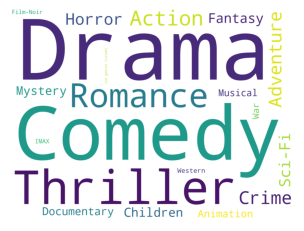

In [32]:

genres_dataset, genres_dataset_test = [], []
for gen in movies.genres:
    tmp = gen.split("|")
    for g in tmp:
        if g and g not in genres_dataset:
            genres_dataset.append(g)
            genres_dataset_test.append([g, 1])
            
        else:
            genres_dataset_test[genres_dataset.index(g)][1] += 1
            
# Sorted by frequency
genres_dataset_test = sorted(genres_dataset_test, key=lambda genres_dataset_test: genres_dataset_test[1], reverse=True)
helper.multi_wordcloud(genres_dataset_test, filename='genres_wordcloud.png')

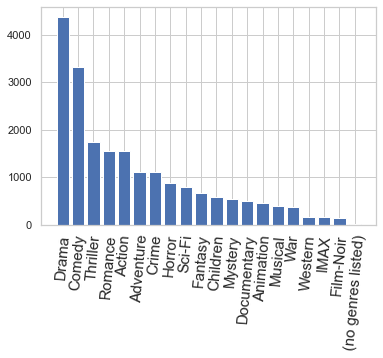

In [33]:
helper.multi_bar(genres_dataset_test, filename='genres_bar.png')

## Romance & SciFi

Try using subset of users, and seeing what their preferred genres are.

In [34]:
# [7]
# Calculate the average rating of romance and scifi movies
genre_ratings = helper.get_genre_ratings(ratings, movies, , ['avg_romance_rating', 'avg_scifi_rating'])
genre_ratings.head()


,avg_romance_rating,avg_scifi_rating
1,3.50,2.40
2,3.59,3.80
3,3.65,3.14
4,4.50,4.26
5,4.08,4.00


The function `get_genre_ratings` calculated each user's average rating of ['Romance', 'Sci-Fi'] movies. 

The bias dataset remove people who like both of all


In [35]:
# [8]
biased_dataset = helper.bias_genre_rating_dataset(genre_ratings, 3.2, 2.5)

print( "Number of records: ", len(biased_dataset))
biased_dataset.head()

Number of records:  183


,index,avg_romance_rating,avg_scifi_rating
0,1,3.50,2.40
1,3,3.65,3.14
2,6,2.90,2.75
3,7,2.93,3.36
4,12,2.89,2.62


So we can see we have 208 users, and for each user we have their average rating of the ['Romance', 'Sci-Fi'] movies they've watched. 

Let us plot this dataset:


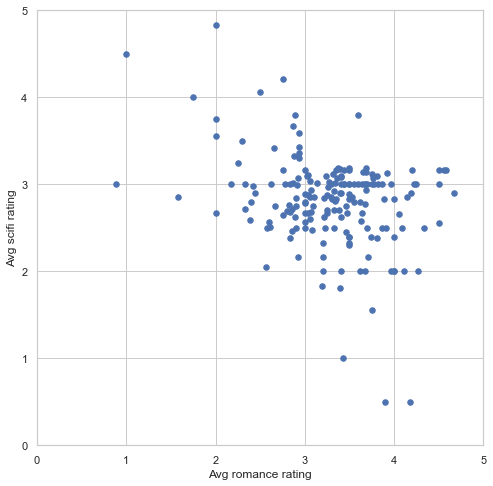

In [36]:
# [9]
%matplotlib inline

helper.draw_scatterplot(biased_dataset['avg_romance_rating'], 'Avg romance rating', biased_dataset['avg_scifi_rating'],'Avg scifi rating')

We can see come clear bias in this sample (that we created on purpose). How would it look if we break the sample down into two groups using k-means?

In [37]:
# [10]
# Let's turn our dataset into a list
X = biased_dataset[['avg_scifi_rating','avg_romance_rating']].values
# X

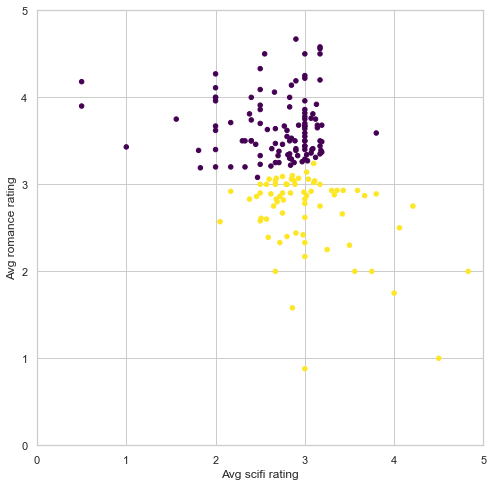

In [38]:
# [11]

# TODO: Import KMeans
from sklearn.cluster import KMeans

# TODO: Create an instance of KMeans to find two clusters
kmeans_1 = KMeans(n_clusters=2)

# TODO: use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(X)

# Plot
helper.draw_clusters(biased_dataset, predictions)

Mostly person rated romance movies
We can see that the groups are mostly based on how each person rated romance movies. If their average rating of romance movies is over 3 stars, then they belong to one group. Otherwise, they belong to the other group.

What would happen if we break them down into three groups?

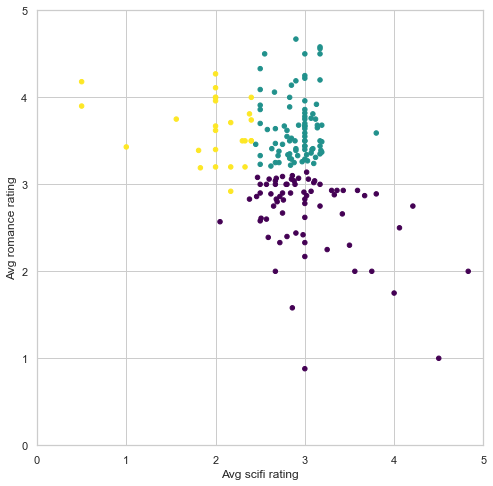

In [39]:
# [12]
# TODO: Create an instance of KMeans to find three clusters
kmeans_2 = KMeans(n_clusters=3)

# TODO: use fit_predict to cluster the dataset
predictions_2 = kmeans_2.fit_predict(X)

# Plot
helper.draw_clusters(biased_dataset, predictions_2)

Now the average scifi rating is starting to come into play. The groups are:

- people who like romance but not scifi
- people who like scifi but not romance
- people who like both scifi and romance
# Let's add one more group

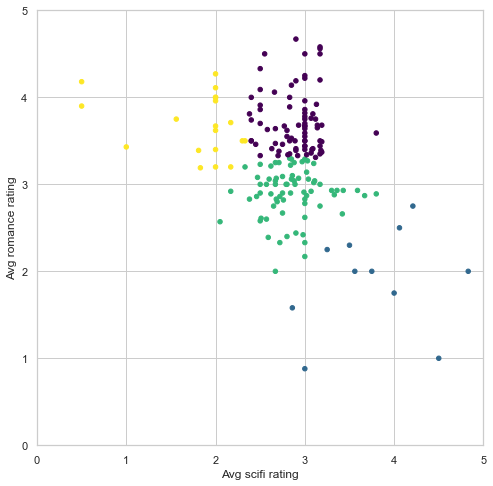

In [40]:
# [13]

# TODO: Create an instance of KMeans to find four clusters
kmeans_3 = KMeans(n_clusters=4, random_state=3)

# TODO: use fit_predict to cluster the dataset
predictions_3 = kmeans_3.fit_predict(X)

# Plot
helper.draw_clusters(biased_dataset, predictions_3)

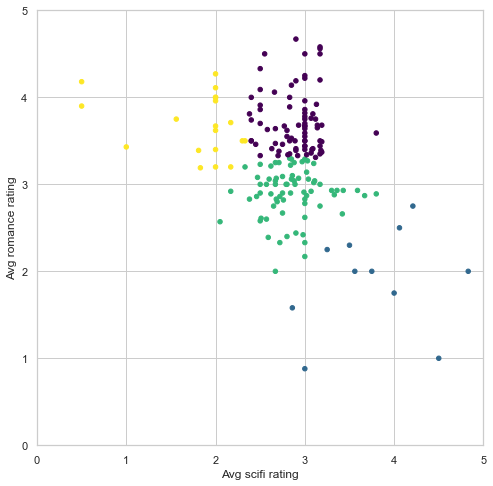

In [41]:
# [14]
# TODO: Create an instance of KMeans to find four clusters
kmeans_3 = KMeans(n_clusters=4, random_state=3)

# TODO: use fit_predict to cluster the dataset
predictions_3 = kmeans_3.fit_predict(X)

# Plot
helper.draw_clusters(biased_dataset, predictions_3)

We can see that the more clusters we break our dataset down into, the more similar the tastes of the population of each cluster to each other.

## Choosing K

Great, so we can cluster our points into any number of clusters. What's the right number of clusters for this dataset?

There are several ways of choosing the number of clusters, k. We'll look at a simple one called "the elbow method". The elbow method works by plotting the ascending values of k versus the total error calculated using that k.

How do we calculate total error? One way to calculate the error is squared error. Say we're calculating the error for k=2. We'd have two clusters each having one "centroid" point. For each point in our dataset, we'd subtract its coordinates from the centroid of the cluster it belongs to. We then square the result of that subtraction (to get rid of the negative values), and sum the values. This would leave us with an error value for each point. If we sum these error values, we'd get the total error for all points when k=2.

Our mission now is to do the same for each k (between 1 and, say, the number of elements in our dataset)

In [42]:
# [15]


# Choose the range of k values to test.
# We added a stride of 5 to improve performance. We don't need to calculate the error for every k value
possible_k_values = range(2, len(X)+1, 5)

# silhouette: hinh` bong, gia tri
# Calculate error values for all k values we're interested in
errors_per_k = [helper.clustering_errors(k, X) for k in possible_k_values]


In [43]:
# [16]
# Optional: Look at the values of K vs the silhouette score of running K-means with that value of k
list(zip(possible_k_values, errors_per_k))

[(2, 0.3558817876472827),
 (7, 0.38909652541692896),
 (12, 0.3515008155875188),
 (17, 0.36735932827740875),
 (22, 0.3747154781759734),
 (27, 0.3700659241473824),
 (32, 0.3705040269367989),
 (37, 0.3715987123136316),
 (42, 0.36168375743986075),
 (47, 0.38269142137401824),
 (52, 0.3811608831721967),
 (57, 0.3631042765959136),
 (62, 0.36452010389219086),
 (67, 0.36056286058546677),
 (72, 0.34761352571920445),
 (77, 0.33683712090088336),
 (82, 0.3297072255073606),
 (87, 0.3278072621666613),
 (92, 0.3361359238399177),
 (97, 0.3322458291284561),
 (102, 0.3057139194760841),
 (107, 0.3145356270278673),
 (112, 0.29478415077912756),
 (117, 0.27691103089976554),
 (122, 0.2617883510497378),
 (127, 0.25523588732626457),
 (132, 0.24406948221999092),
 (137, 0.2253990287249786),
 (142, 0.21634888991892054),
 (147, 0.1987098694543779),
 (152, 0.18577028575410776),
 (157, 0.16496749756636125),
 (162, 0.14759705165906709),
 (167, 0.12920960729960135),
 (172, 0.09984309419920603),
 (177, 0.064230120163174

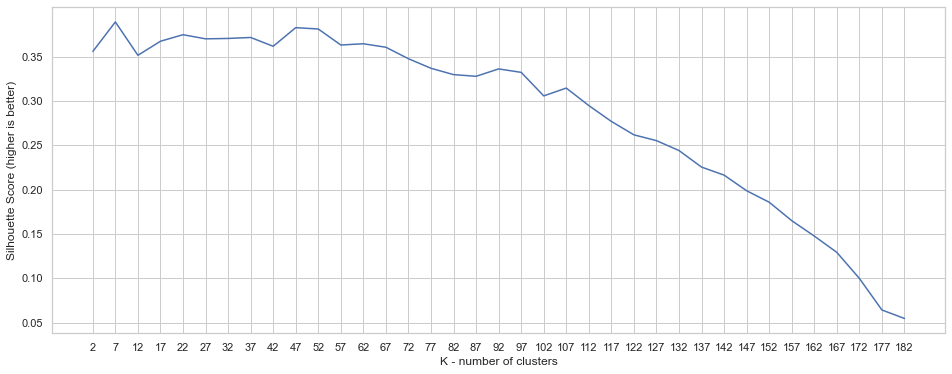

In [44]:
# [17]
# Plot the each value of K vs. the silhouette score at that value
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_xlabel('K - number of clusters')
ax.set_ylabel('Silhouette Score (higher is better)')
ax.plot(possible_k_values, errors_per_k)

# Ticks and grid
xticks = np.arange(min(possible_k_values), max(possible_k_values)+1, 5.0)
ax.set_xticks(xticks, minor=False)
ax.set_xticks(xticks, minor=True)
ax.xaxis.grid(True, which='both')
yticks = np.arange(round(min(errors_per_k), 2), max(errors_per_k), .05)
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.yaxis.grid(True, which='both')

Looking at this graph, good choices for k include 7, 22, 27, 32, amongst other values (with a slight variation between different runs). Increasing the number of clusters (k) beyond that range starts to result in worse clusters (according to Silhouette score)

My pick would be k=7 because it's easier to visualize:

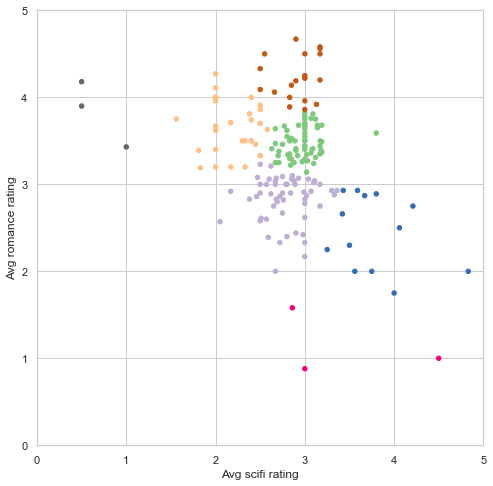

In [45]:
# [18]
# TODO: Create an instance of KMeans to find seven clusters
kmeans_4 = KMeans(n_clusters=7, random_state=6)

# TODO: use fit_predict to cluster the dataset
predictions_4 = kmeans_4.fit_predict(X)

# plot
helper.draw_clusters(biased_dataset, predictions_4, cmap='Accent')

Note: As you try to plot larger values of k (more than 10), you'll have to make sure your plotting library is not reusing colors between clusters. For this plot, we had to use the matplotlib colormap 'Accent' because other colormaps either did not show enough contrast between colors, or were recycling colors past 8 or 10 clusters.

## Throwing some Action into the mix
So far, we've only been looking at how users rated romance and scifi movies. Let's throw another genre into the mix. Let's add the Action genre.

Our dataset now looks like this:


In [46]:
biased_dataset_3_genres = helper.get_genre_ratings(ratings, movies,
                                                     ['Romance', 'Sci-Fi', 'Action'],
                                                     ['avg_romance_rating', 'avg_scifi_rating', 'avg_action_rating'])
biased_dataset_3_genres = helper.bias_genre_rating_dataset(biased_dataset_3_genres, 3.2, 2.5).dropna()

print( "Number of records: ", len(biased_dataset_3_genres))
biased_dataset_3_genres.head()

Number of records:  183


,index,avg_romance_rating,avg_scifi_rating,avg_action_rating
0,1,3.50,2.40,2.80
1,3,3.65,3.14,3.47
2,6,2.90,2.75,3.27
3,7,2.93,3.36,3.29
4,12,2.89,2.62,3.21


In [47]:
# [20]
X_with_action = biased_dataset_3_genres[['avg_scifi_rating',
                                                           'avg_romance_rating',
                                                           'avg_action_rating']].values

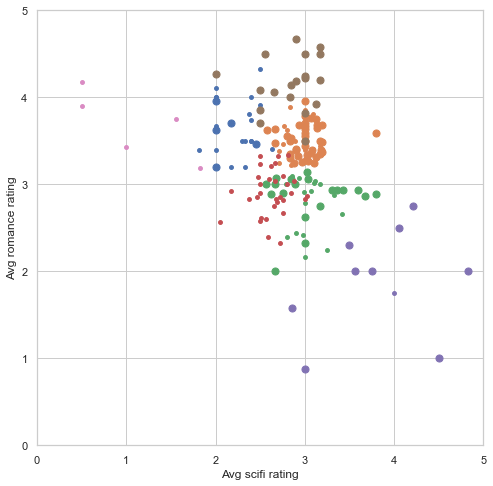

In [48]:
# [21]
# TODO: Create an instance of KMeans to find seven clusters
kmeans_5 = KMeans(n_clusters=7)

# TODO: use fit_predict to cluster the dataset
predictions_5 = kmeans_5.fit_predict(X_with_action)

# plot
helper.draw_clusters_3d(biased_dataset_3_genres, predictions_5)


We're still using the x and y axes for scifi and romance respectively. We are using the size of the dot to roughly code the 'action' rating (large dot for avg ratings over than 3, small dot otherwise).

We can start seeing the added genre is changing how the users are clustered. The more data we give to k-means, the more similar the tastes of the people in each group would be. Unfortunately, though, we lose the ability to visualize what's going on past two or three dimensions if we continue to plot it this way. In the next section, we'll start using a different kind of plot to be able to see clusters with up to fifty dimensions.

## Movie-level Clustering
Now that we've established some trust in how k-means clusters users based on their genre tastes, let's take a bigger bite and look at how users rated individual movies. To do that, we'll shape the dataset in the form of userId vs user rating for each movie. For example, let's look at a subset of the dataset:

In [49]:
# [22]

# Merge the two tables then pivot so we have Users X Movies dataframe
ratings_title = pd.merge(ratings, movies[['movieId', 'title']], on='movieId' )
user_movie_ratings = pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')

print('dataset dimensions: ', user_movie_ratings.shape, '\n\nSubset example:')
user_movie_ratings.iloc[:6, :10]

dataset dimensions:  (671, 9064) 

Subset example:


title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN



The dominance of NaN values presents the first issue. Most users have not rated and watched most movies. Datasets like this are called "sparse" because only a small number of cells have values.

To get around this, let's sort by the most rated movies, and the users who have rated the most number of movies. That will present a more 'dense' region when we peak at the top of the dataset.

If we're to choose the most-rated movies vs users with the most ratings, it would look like this:


In [50]:
# [23]

n_movies = 30
n_users = 18
most_rated_movies_users_selection = helper.sort_by_rating_density(user_movie_ratings, n_movies, n_users)

print('dataset dimensions: ', most_rated_movies_users_selection.shape)
most_rated_movies_users_selection.head(20)

dataset dimensions:  (18, 30)


title,Forrest Gump (1994),Pulp Fiction (1994),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),"Matrix, The (1999)",Toy Story (1995),Schindler's List (1993),Terminator 2: Judgment Day (1991),...,Dances with Wolves (1990),Fight Club (1999),"Usual Suspects, The (1995)",Seven (a.k.a. Se7en) (1995),"Lion King, The (1994)","Godfather, The (1972)","Lord of the Rings: The Fellowship of the Ring, The (2001)",Apollo 13 (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
29,5.0,5.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,4.0,...,5.0,4.0,5.0,4.0,3.0,5.0,3.0,5.0,4.0,2.0
508,4.0,5.0,4.0,4.0,5.0,3.0,4.5,3.0,5.0,2.0,...,5.0,4.0,5.0,4.0,3.5,5.0,4.5,3.0,2.0,4.0
14,1.0,5.0,2.0,5.0,5.0,3.0,5.0,2.0,4.0,4.0,...,3.0,5.0,5.0,5.0,4.0,5.0,5.0,3.0,4.0,4.0
72,5.0,5.0,5.0,4.5,4.5,4.0,4.5,5.0,5.0,3.0,...,4.5,5.0,5.0,5.0,5.0,5.0,5.0,3.5,3.0,5.0
653,4.0,5.0,5.0,4.5,5.0,4.5,5.0,5.0,5.0,5.0,...,4.5,5.0,5.0,4.5,5.0,4.5,5.0,5.0,4.0,5.0
22,4.5,4.5,5.0,4.5,4.5,3.5,4.0,3.0,3.5,3.5,...,2.5,3.5,4.0,4.5,NaN,5.0,4.0,3.5,4.0,4.0
460,4.0,4.5,5.0,5.0,4.5,5.0,4.5,3.5,4.0,5.0,...,4.0,5.0,4.0,5.0,1.5,5.0,4.5,3.0,2.5,NaN
267,5.0,5.0,3.5,5.0,5.0,4.5,4.5,5.0,5.0,5.0,...,NaN,4.5,3.5,4.0,5.0,4.5,5.0,4.5,4.0,3.0
561,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.5,4.0,5.0,...,4.0,4.5,5.0,4.5,4.5,4.0,5.0,4.5,4.0,4.0
354,5.0,4.5,5.0,4.5,5.0,3.5,5.0,3.0,4.0,4.0,...,4.0,5.0,3.5,5.0,4.0,5.0,4.5,3.0,3.5,4.0


5 rows × 30 columns

That's more like it. Let's also establish a good way for visualizing these ratings so we can attempt to visually recognize the ratings (and later, clusters) when we look at bigger subsets.

Let's use colors instead of the number ratings:

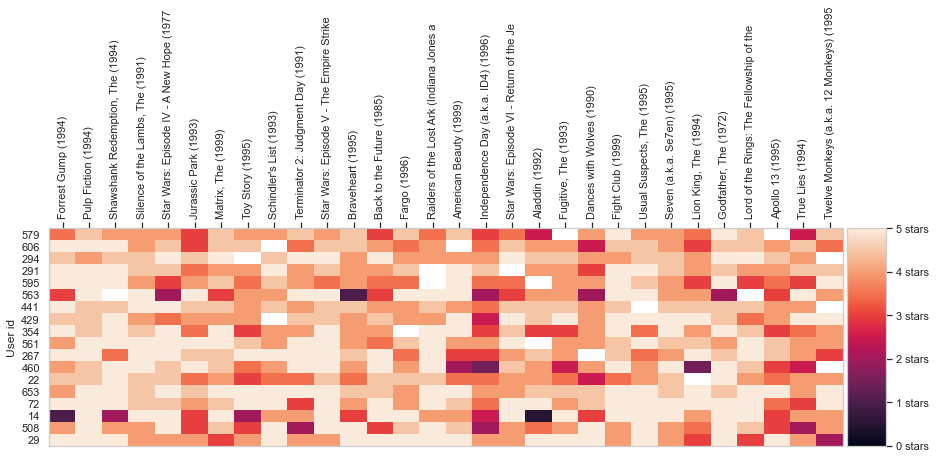

In [51]:
# [24]
helper.draw_movies_heatmap(most_rated_movies_users_selection)


Each column is a movie. Each row is a user. The color of the cell is how the user rated that movie based on the scale on the right of the graph.

Notice how some cells are white? This means the respective user did not rate that movie. This is an issue you'll come across when clustering in real life. Unlike the clean example we started with, real-world datasets can often be sparse and not have a value in each cell of the dataset. This makes it less straightforward to cluster users directly by their movie ratings as k-means generally does not like missing values.

For performance reasons, we'll only use ratings for 1000 movies (out of the 9000+ available in the dataset).

In [52]:
# [25]
user_movie_ratings =  pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')
most_rated_movies_1k = helper.get_most_rated_movies(user_movie_ratings, 1000)
most_rated_movies_1k


title,Forrest Gump (1994),Pulp Fiction (1994),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),"Matrix, The (1999)",Toy Story (1995),Schindler's List (1993),Terminator 2: Judgment Day (1991),...,Insomnia (2002),What Lies Beneath (2000),Roman Holiday (1953),"Motorcycle Diaries, The (Diarios de motocicleta) (2004)",Sophie's Choice (1982),Dawn of the Dead (2004),Ocean's Thirteen (2007),Seabiscuit (2003),Easy Rider (1969),Lucky Number Slevin (2006)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,4.0,NaN,3.0,NaN,4.0,NaN,NaN,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,4.5,5.0,3.0,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,5.0,NaN,NaN,5.0,5.0,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,4.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
667,NaN,5.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,5.0,5.0,NaN,NaN,4.0,4.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:

# most_rated_movies_1k = most_rated_movies_1k.replace(np.nan, 0)
# most_rated_movies_1k = most_rated_movies_1k.fillna(most_rated_movies_1k.mean())

In [54]:
most_rated_movies_1k

title,Forrest Gump (1994),Pulp Fiction (1994),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),"Matrix, The (1999)",Toy Story (1995),Schindler's List (1993),Terminator 2: Judgment Day (1991),...,Insomnia (2002),What Lies Beneath (2000),Roman Holiday (1953),"Motorcycle Diaries, The (Diarios de motocicleta) (2004)",Sophie's Choice (1982),Dawn of the Dead (2004),Ocean's Thirteen (2007),Seabiscuit (2003),Easy Rider (1969),Lucky Number Slevin (2006)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,4.0,NaN,3.0,NaN,4.0,NaN,NaN,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,4.5,5.0,3.0,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,5.0,NaN,NaN,5.0,5.0,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,4.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
667,NaN,5.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,5.0,5.0,NaN,NaN,4.0,4.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To have sklearn run k-means clustering to a dataset with missing values like this, we will first cast it to the sparse csr matrix type defined in the SciPi library.

To convert from a pandas dataframe to a sparse matrix, we'll have to convert to SparseDataFrame, then use pandas' to_coo() method for the conversion.

Note: to_coo() was only added in later versions of pandas. If you run into an error with the next cell, make sure pandas is up to date.

In [55]:
# [26]
# sparse_ratings = csr_matrix(pd.SparseDataFrame(most_rated_movies_1k).to_coo())
# sparse_arr = csr_matrix(most_rated_movies_1k)
# sdf = pd.DataFrame.sparse.from_spmatrix(sparse_arr)
# sparse_ratings = sdf.sparse.to_coo()

sdf = most_rated_movies_1k.astype(pd.SparseDtype("float", np.nan))
sparse_ratings = sdf.sparse.to_coo()



## Let's cluster!
With k-means, we have to specify k, the number of clusters. Let's arbitrarily try k=20 (A better way to pick k is as illustrated above with the elbow method. That would take some processing time to run, however.):

In [56]:
sparse_ratings


<671x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 62397 stored elements in COOrdinate format>

In [57]:
# [27]
# 20 clusters

predictions = KMeans(n_clusters=20, algorithm='full').fit_predict(sparse_ratings)


cluster # 2
# of users in cluster: 260. # of users in plot: 70


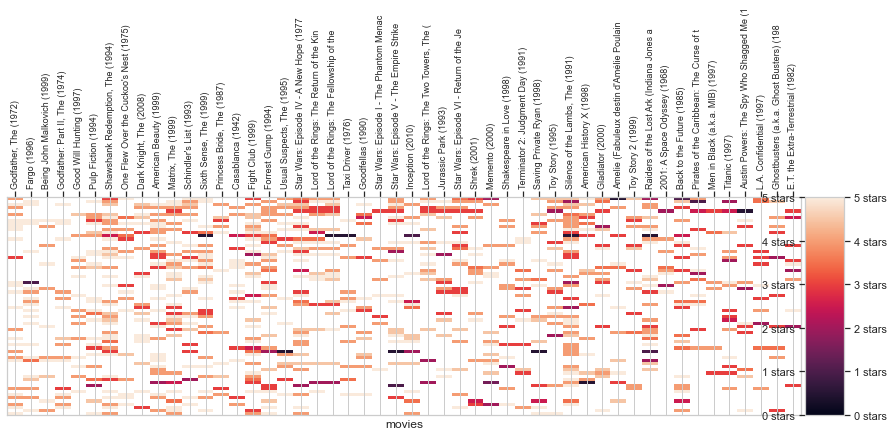

cluster # 17
# of users in cluster: 44. # of users in plot: 44


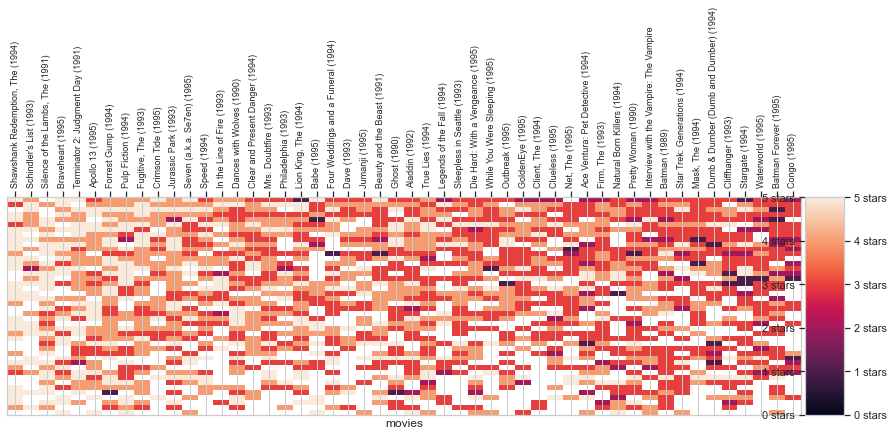

cluster # 4
# of users in cluster: 78. # of users in plot: 70


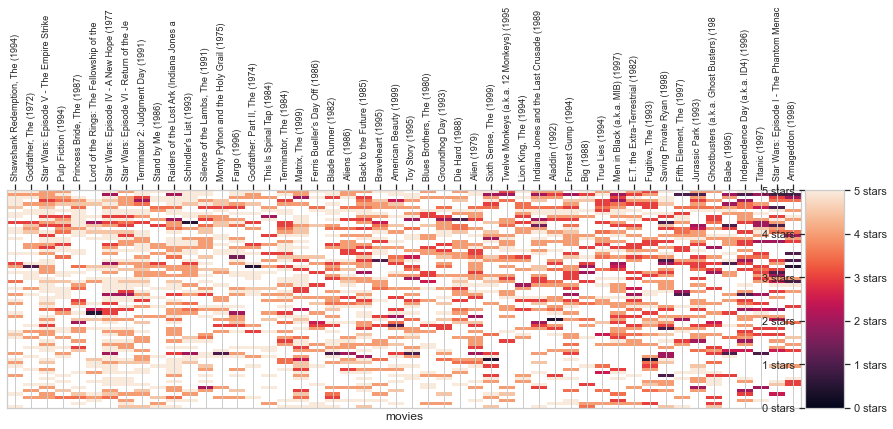

cluster # 1
# of users in cluster: 44. # of users in plot: 44


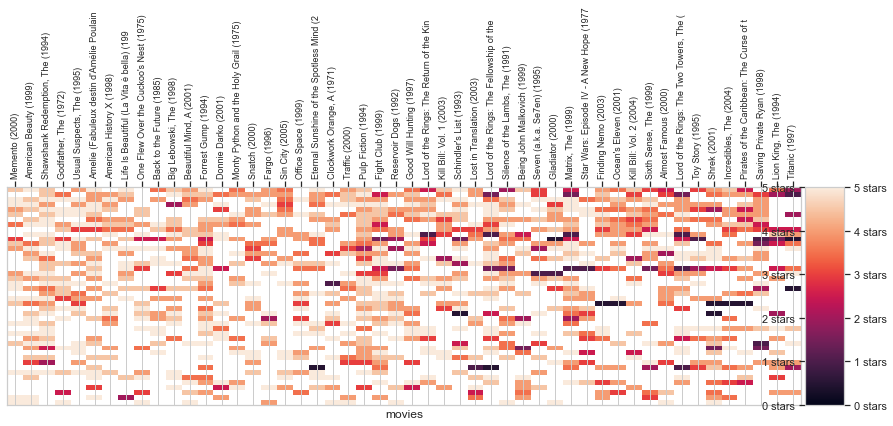

cluster # 16
# of users in cluster: 22. # of users in plot: 22


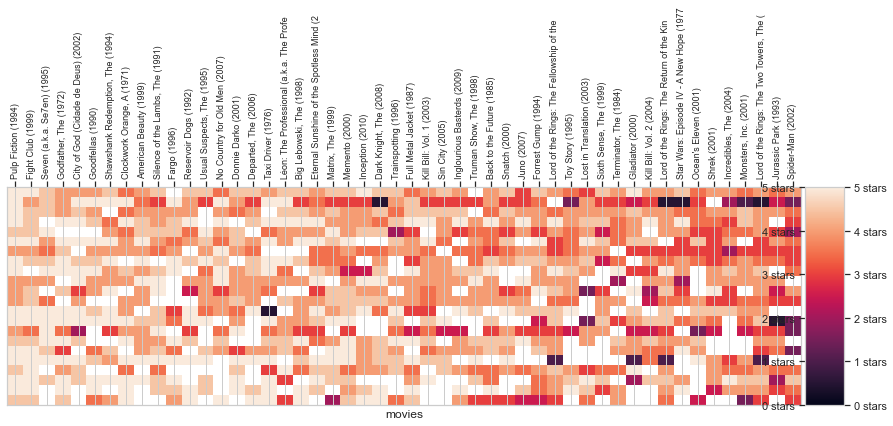

cluster # 8
# of users in cluster: 36. # of users in plot: 36


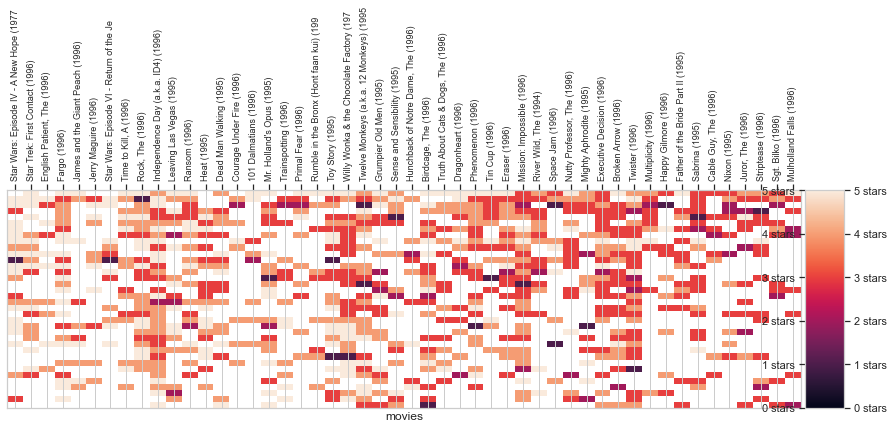

cluster # 11
# of users in cluster: 63. # of users in plot: 63


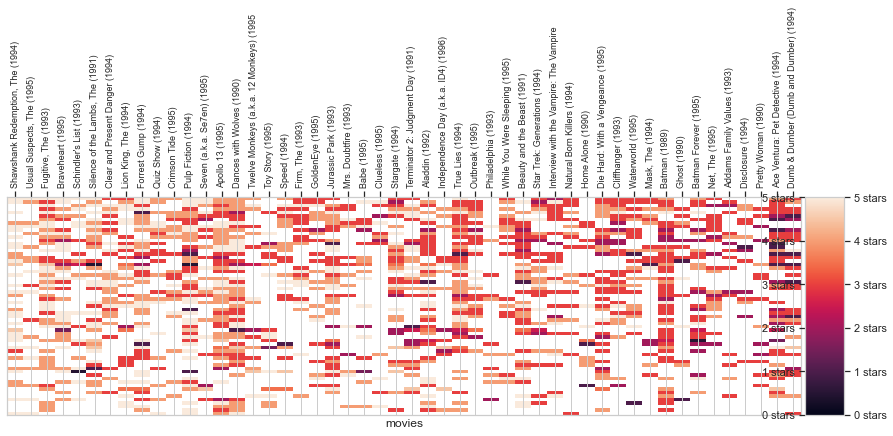

cluster # 9
# of users in cluster: 15. # of users in plot: 15


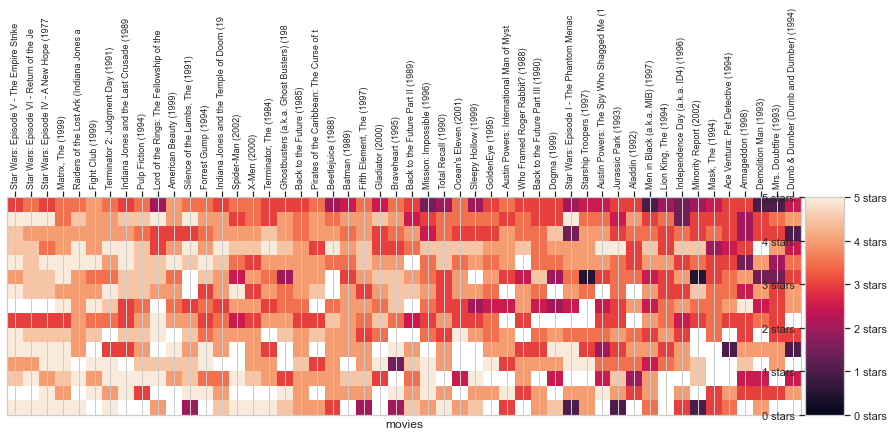

cluster # 19
# of users in cluster: 44. # of users in plot: 44


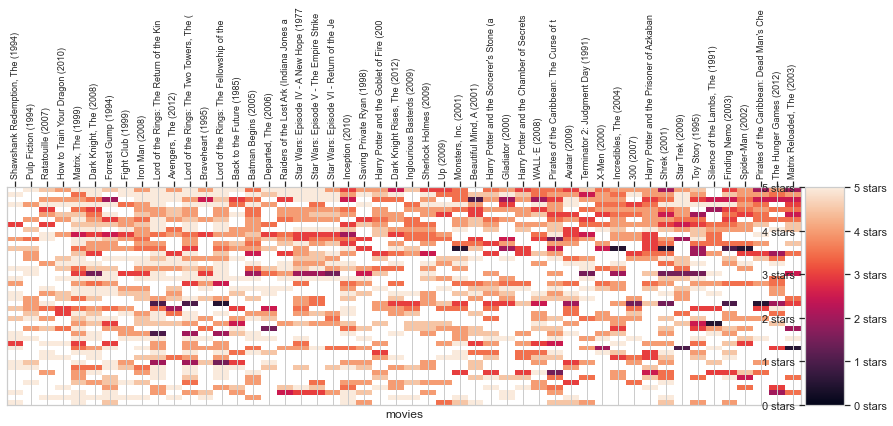

cluster # 6
# of users in cluster: 21. # of users in plot: 21


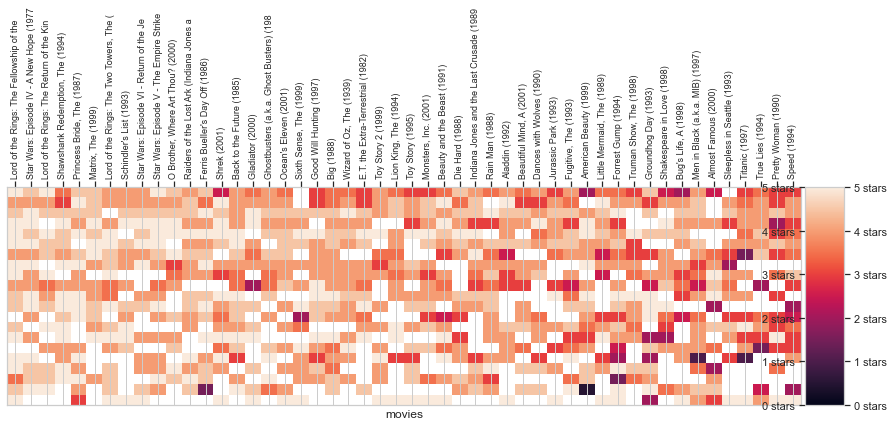

In [58]:
# [28]
max_users = 70
max_movies = 50
clustered = pd.concat([most_rated_movies_1k.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
helper.draw_movie_clusters(clustered, max_users, max_movies)

There are several things to note here:

The more similar the ratings in a cluster are, the more vertical lines in similar colors you'll be able to trace in that cluster.
It's super interesting to spot trends in clusters:
Some clusters are more sparse than others, containing people who probably watch and rate less movies than in other clusters.
Some clusters are mostly yellow and bring together people who really love a certain group of movies. Other clusters are mostly green or navy blue meaning they contain people who agree that a certain set of movoies deserves 2-3 stars.
Note how the movies change in every cluster. The graph filters the data to only show the most rated movies, and then sorts them by average rating.
Can you track where the Lord of the Rings movies appear in each cluster? What about Star Wars movies?
It's easy to spot horizontal lines with similar colors, these are users without a lot of variety in their ratings. This is likely one of the reasons for Netflix switching from a stars-based ratings to a thumbs-up/thumbs-down rating. A rating of four stars means different things to different people.
We did a few things to make the clusters visibile (filtering/sorting/slicing). This is because datasets like this are "sparse" and most cells do not have a value (because most people did not watch most movies).

## Prediction
Let's pick a cluster and a specific user and see what useful things this clustering will allow us to do.

Let's first pick a cluster:

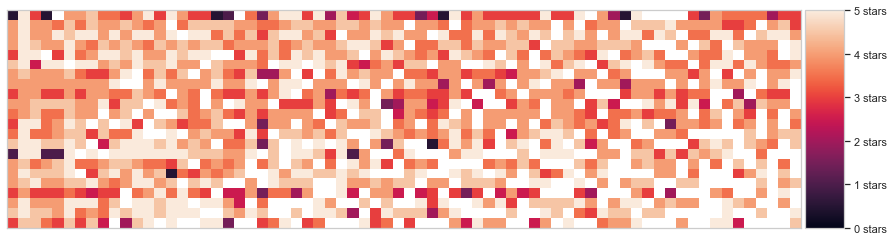

In [59]:
# [29]

# TODO: Pick a cluster ID from the clusters above
cluster_number = 16

# Let's filter to only see the region of the dataset with the most number of values 
n_users = 226
n_movies = 70
cluster = clustered[clustered.group == cluster_number].drop(['index', 'group'], axis=1)

cluster = helper.sort_by_rating_density(cluster, n_movies, n_users)
helper.draw_movies_heatmap(cluster, axis_labels=False)

In [64]:
# [30]
cluster.head()


,"Lord of the Rings: The Two Towers, The (2002)",Pulp Fiction (1994),Memento (2000),"Lord of the Rings: The Return of the King, The (2003)","Lord of the Rings: The Fellowship of the Ring, The (2001)",Fight Club (1999),Back to the Future (1985),Full Metal Jacket (1987),Forrest Gump (1994),Eternal Sunshine of the Spotless Mind (2004),...,"Beautiful Mind, A (2001)",Minority Report (2002),Old Boy (2003),One Flew Over the Cuckoo's Nest (1975),"Hangover, The (2009)",Groundhog Day (1993),Requiem for a Dream (2000),"Bourne Identity, The (2002)",Little Miss Sunshine (2006),Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
14,0.5,5.0,3.0,0.5,NaN,4.0,4.0,4.5,3.5,3.5,...,3.0,1.5,4.0,3.5,3.5,3.5,3.5,2.0,3.0,3.0
20,4.0,5.0,4.0,4.0,3.5,4.5,3.5,4.5,4.0,4.0,...,4.0,4.0,4.0,3.0,3.0,3.5,NaN,4.0,4.5,3.0
15,4.0,5.0,4.0,4.0,5.0,4.5,5.0,5.0,4.0,5.0,...,3.5,3.5,5.0,5.0,3.5,NaN,4.5,5.0,5.0,4.0
21,4.0,5.0,4.5,4.0,4.0,5.0,4.0,3.5,4.5,4.0,...,NaN,4.5,3.5,NaN,4.5,4.0,4.0,4.0,NaN,5.0
19,3.0,5.0,5.0,NaN,3.0,5.0,3.5,4.0,5.0,5.0,...,4.0,3.5,3.5,5.0,NaN,4.0,4.0,3.5,NaN,5.0


Pick a blank cell from the table. It's blank because that user did not rate that movie. Can we predict whether she would like it or not? Since the user is in a cluster of users that seem to have similar taste, we can take the average of the votes for that movie in this cluster, and that would be a reasonable predicition for much she would enjoy the film.


In [62]:
# [31]
# TODO: Fill in the name of the column/movie. e.g. 'Forrest Gump (1994)'
# Pick a movie from the table above since we're looking at a subset
movie_name = 'Pulp Fiction (1994)'

cluster[movie_name].mean()

4.681818181818182

# Recommendation
Let's reiterate what we did in the previous step. We have used k-means to cluster users according to their ratings. This lead us to clusters of users with similar ratings and thus generally a similar taste in movies. Based on this, when one user did not have a rating for a certain movie we averaged the ratings of all the other users in the cluster, and that was our guess to how this one user would like the movie.

Using this logic, if we calculate the average score in this cluster for every movie, we'd have an understanding for how this 'taste cluster' feels about each movie in the dataset.

In [63]:
# [32]
# The average rating of 20 movies as rated by the users in the cluster
cluster.mean().head()

Lord of the Rings: The Two Towers, The (2002)                3.500000
Pulp Fiction (1994)                                          4.681818
Memento (2000)                                               4.159091
Lord of the Rings: The Return of the King, The (2003)        3.642857
Lord of the Rings: The Fellowship of the Ring, The (2001)    3.809524
dtype: float64

In [65]:
# TODO: Pick a user ID from the dataset
# Look at the table above outputted by the command "cluster.fillna('').head()" 
# and pick one of the user ids (the first column in the table)
user_id = 19

# Get all this user's ratings
user_test_ratings  = cluster.loc[user_id, :]

# Which movies did they not rate? (We don't want to recommend movies they've already rated)
user_test_unrated_movies =  user_test_ratings[user_test_ratings.isnull()]

# What are the ratings of these movies the user did not rate?
avg_ratings = pd.concat([user_test_unrated_movies, cluster.mean()], axis=1, join='inner').loc[:,0]

# Let's sort by rating so the highest rated movies are presented first
avg_ratings.sort_values(ascending=False)[:20]

Inception (2010)                                                                  4.147059
Dark Knight, The (2008)                                                           4.111111
Little Miss Sunshine (2006)                                                       4.107143
Inglourious Basterds (2009)                                                       4.000000
Juno (2007)                                                                       3.937500
WALL·E (2008)                                                                     3.857143
Batman Begins (2005)                                                              3.750000
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    3.733333
Lord of the Rings: The Return of the King, The (2003)                             3.642857
Hangover, The (2009)                                                              3.607143
Monsters, Inc. (2001)                                                             3.500000